# Exploratory Data analysis on cirrhosis dataset

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split

# Loading the dataset

In [195]:
data= pd.read_csv('cirrhosis.csv')
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [196]:
df= data.copy()

# Basic analysis

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [198]:
df.size

8360

In [199]:
df.shape

(418, 20)

**5point summary for numeric**

In [200]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


**5point summary for categorical**

In [201]:
df.describe(include='O')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


**Categorical Columns**

In [204]:
df.select_dtypes(exclude=np.number).columns

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

**Numeric columns**

In [205]:
df.select_dtypes(include=np.number).columns

Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

# Missing values

In [202]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [203]:
(df.isnull().sum()/len(df))*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

# Imputing median for numeric variables

In [207]:
df['Copper'].fillna(df['Copper'].median(), inplace=True)
df['Alk_Phos'].fillna(df['Alk_Phos'].median(), inplace=True)
df['SGOT'].fillna(df['SGOT'].median(), inplace=True)
df['Tryglicerides'].fillna(df['Tryglicerides'].median(), inplace=True)
df['Platelets'].fillna(df['Platelets'].median(), inplace=True)
df['Stage'].fillna(df['Stage'].median(), inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)
df['Prothrombin'].fillna(df['Prothrombin'].median(), inplace=True)


# Imputing median for categorical variables

In [208]:
df['Drug'].fillna(df['Drug'].mode()[0], inplace=True)
df['Ascites'].fillna(df['Ascites'].mode()[0], inplace=True)
df['Hepatomegaly'].fillna(df['Hepatomegaly'].mode()[0], inplace=True)
df['Spiders'].fillna(df['Spiders'].mode()[0], inplace=True)


In [209]:
(df.isnull().sum()/len(df))*100

ID               0.0
N_Days           0.0
Status           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

# Duplicate values

In [210]:
df[df.duplicated()]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


* As we can see that there are no duplicate values

In [211]:
import pandas as pd

# Assuming 'Age' is the column containing age in days
df['Age'] = (df['Age'] / 365.25)


In [212]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,D-penicillamine,67.000684,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,415,1103,C,D-penicillamine,39.000684,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,416,1055,C,D-penicillamine,56.999316,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,417,691,C,D-penicillamine,58.001369,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


# Dropping irrelevant columns

In [213]:
df.drop('ID',axis=1,inplace=True)

In [310]:
df.drop('N_Days',axis=1,inplace=True)

In [214]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58.765229,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.446270,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.072553,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,54.740589,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.105407,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,D-penicillamine,67.000684,F,N,Y,N,N,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103,C,D-penicillamine,39.000684,F,N,Y,N,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055,C,D-penicillamine,56.999316,F,N,Y,N,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691,C,D-penicillamine,58.001369,F,N,Y,N,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


# Univariate

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


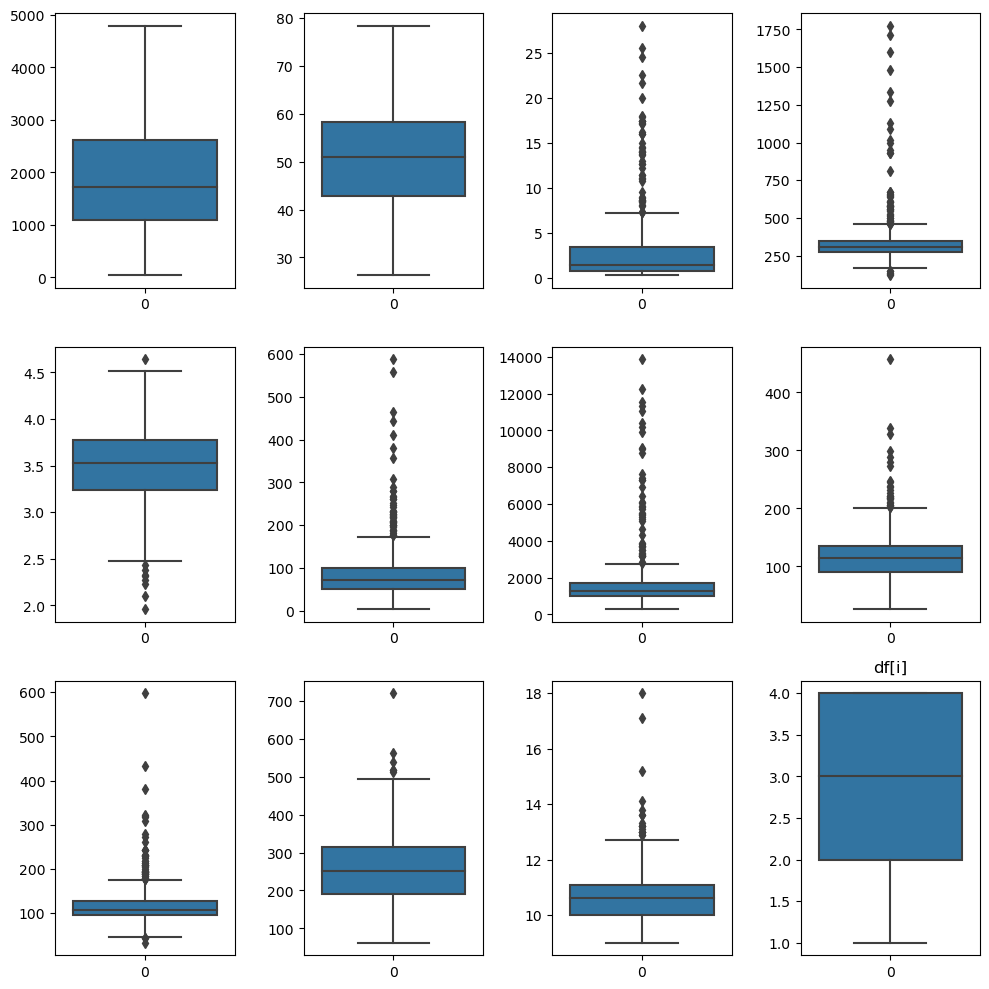

In [216]:
fig, ax= plt.subplots(3,4, figsize=(10,10))
cols=list(df.select_dtypes(include=np.number).columns)
print(cols)
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

* There are presence of both positive and negative outliers

['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


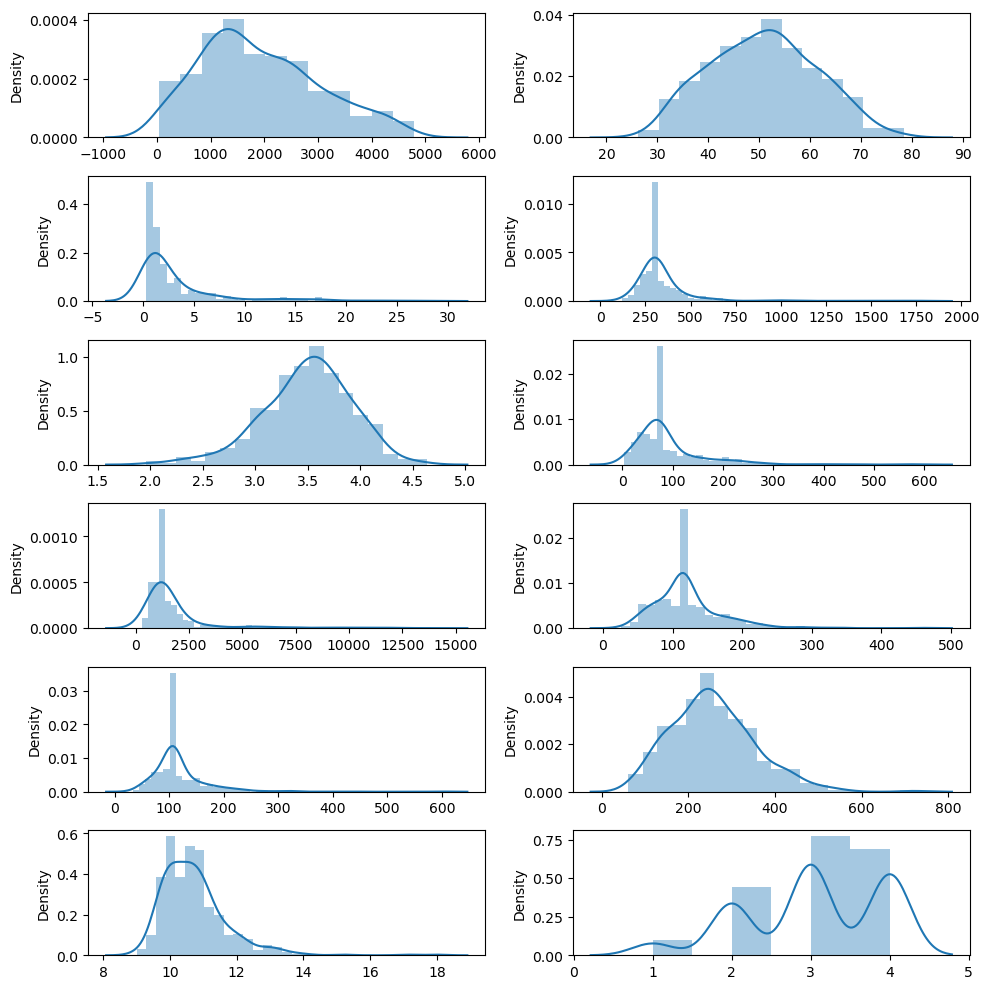

In [217]:
cols  = list(df.select_dtypes(include=np.number).columns)
print(cols)
plt.figure(figsize = (10,10))
for i,j in enumerate(cols):
    plt.subplot(6,2,i+1)
    sns.distplot(x=df[j])
plt.tight_layout()
plt.show()

* Almost all the variables are either right or left skewed

# Distribution of Categorial variables

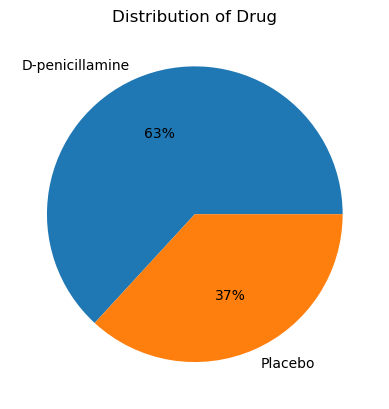

In [219]:
plt.pie(data=df,x=df['Drug'].value_counts(),labels=df['Drug'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Drug")
plt.show()

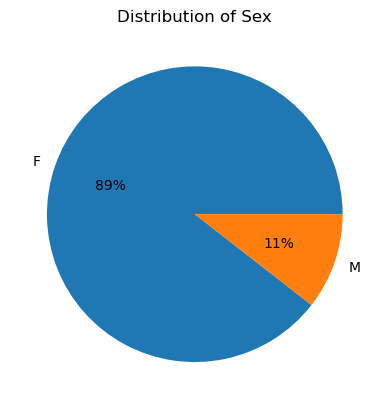

In [220]:
plt.pie(data=df,x=df['Sex'].value_counts(),labels=df['Sex'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Sex")
plt.show()

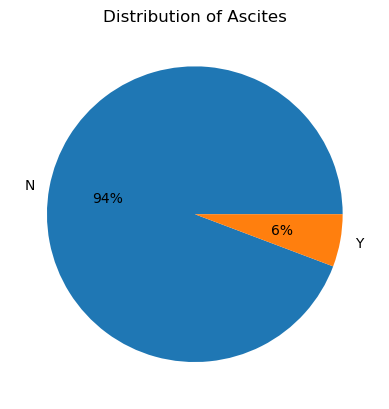

In [221]:
plt.pie(data=df,x=df['Ascites'].value_counts(),labels=df['Ascites'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Ascites")
plt.show()

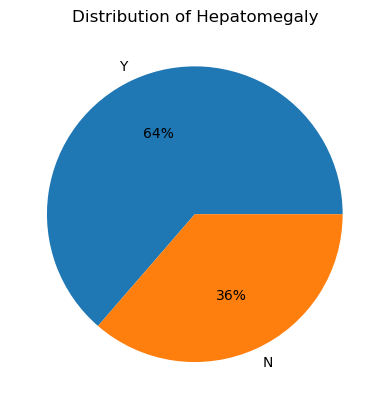

In [222]:
plt.pie(data=df,x=df['Hepatomegaly'].value_counts(),labels=df['Hepatomegaly'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Hepatomegaly")
plt.show()

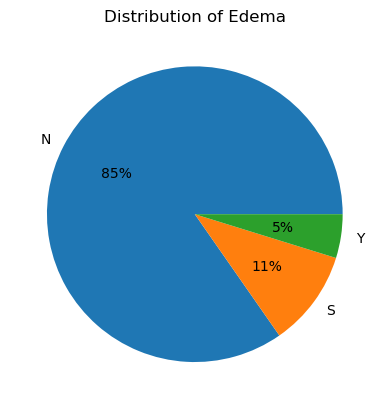

In [223]:
plt.pie(data=df,x=df['Edema'].value_counts(),labels=df['Edema'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Edema")
plt.show()

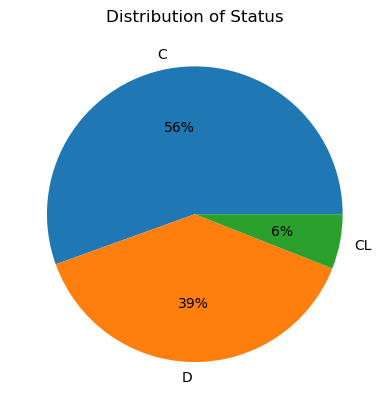

In [224]:
plt.pie(data=df,x=df['Status'].value_counts(),labels=df['Status'].value_counts().keys(),autopct='%.0f%%')
plt.title("Distribution of Status")
plt.show()

# Bivariate

<Axes: xlabel='Status', ylabel='Age'>

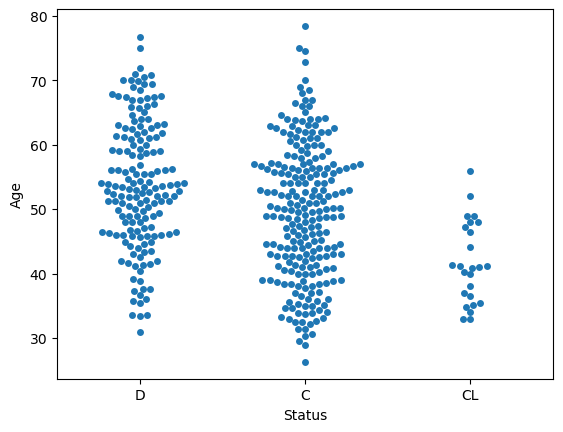

In [227]:
sns.swarmplot(y=df['Age'],x=df['Status'])

<Axes: xlabel='Bilirubin', ylabel='Density'>

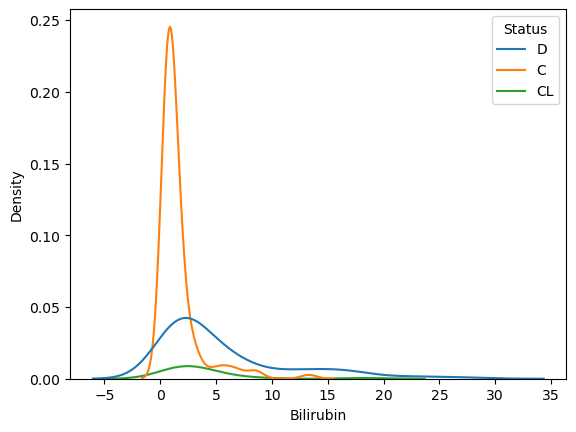

In [228]:
sns.kdeplot(x=df['Bilirubin'],hue=df['Status'])

<Axes: xlabel='Status', ylabel='Cholesterol'>

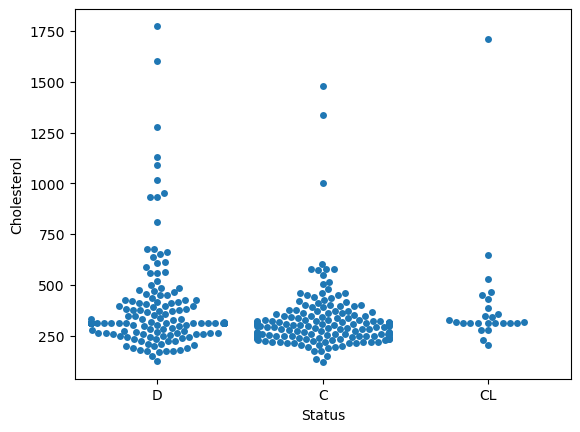

In [229]:
sns.swarmplot(y=df['Cholesterol'],x=df['Status'])

<Axes: xlabel='Status', ylabel='Albumin'>

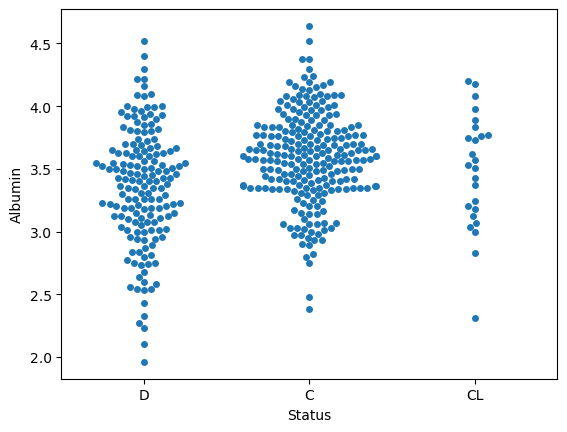

In [230]:
sns.swarmplot(y=df['Albumin'],x=df['Status'])

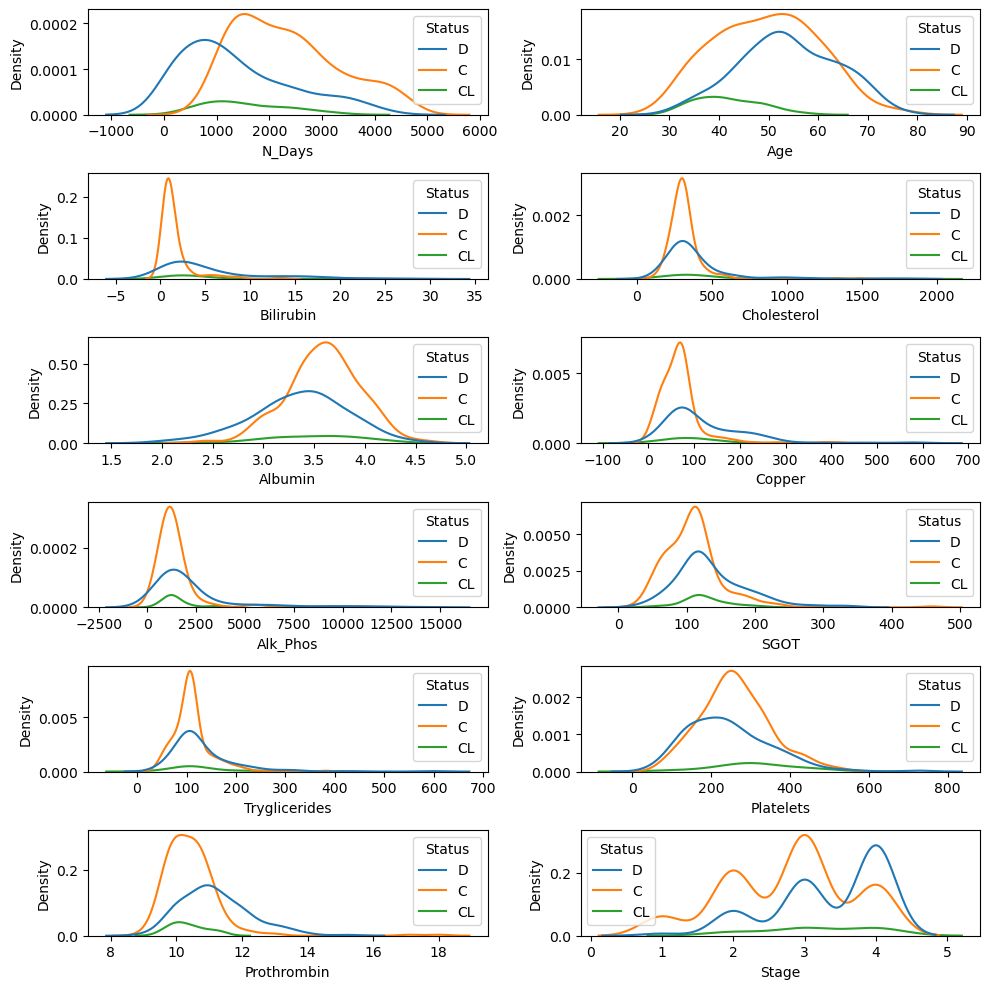

In [231]:
cols = list(df.select_dtypes(include=np.number).columns)

# Calculate the number of rows and columns dynamically based on the number of subplots
num_cols = 2
num_rows = (len(cols) + num_cols - 1) // num_cols

plt.figure(figsize=(10, 10))

for i, j in enumerate(cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(x=df[j], hue=df['Status'])

plt.tight_layout()
plt.show()


# Multivariate

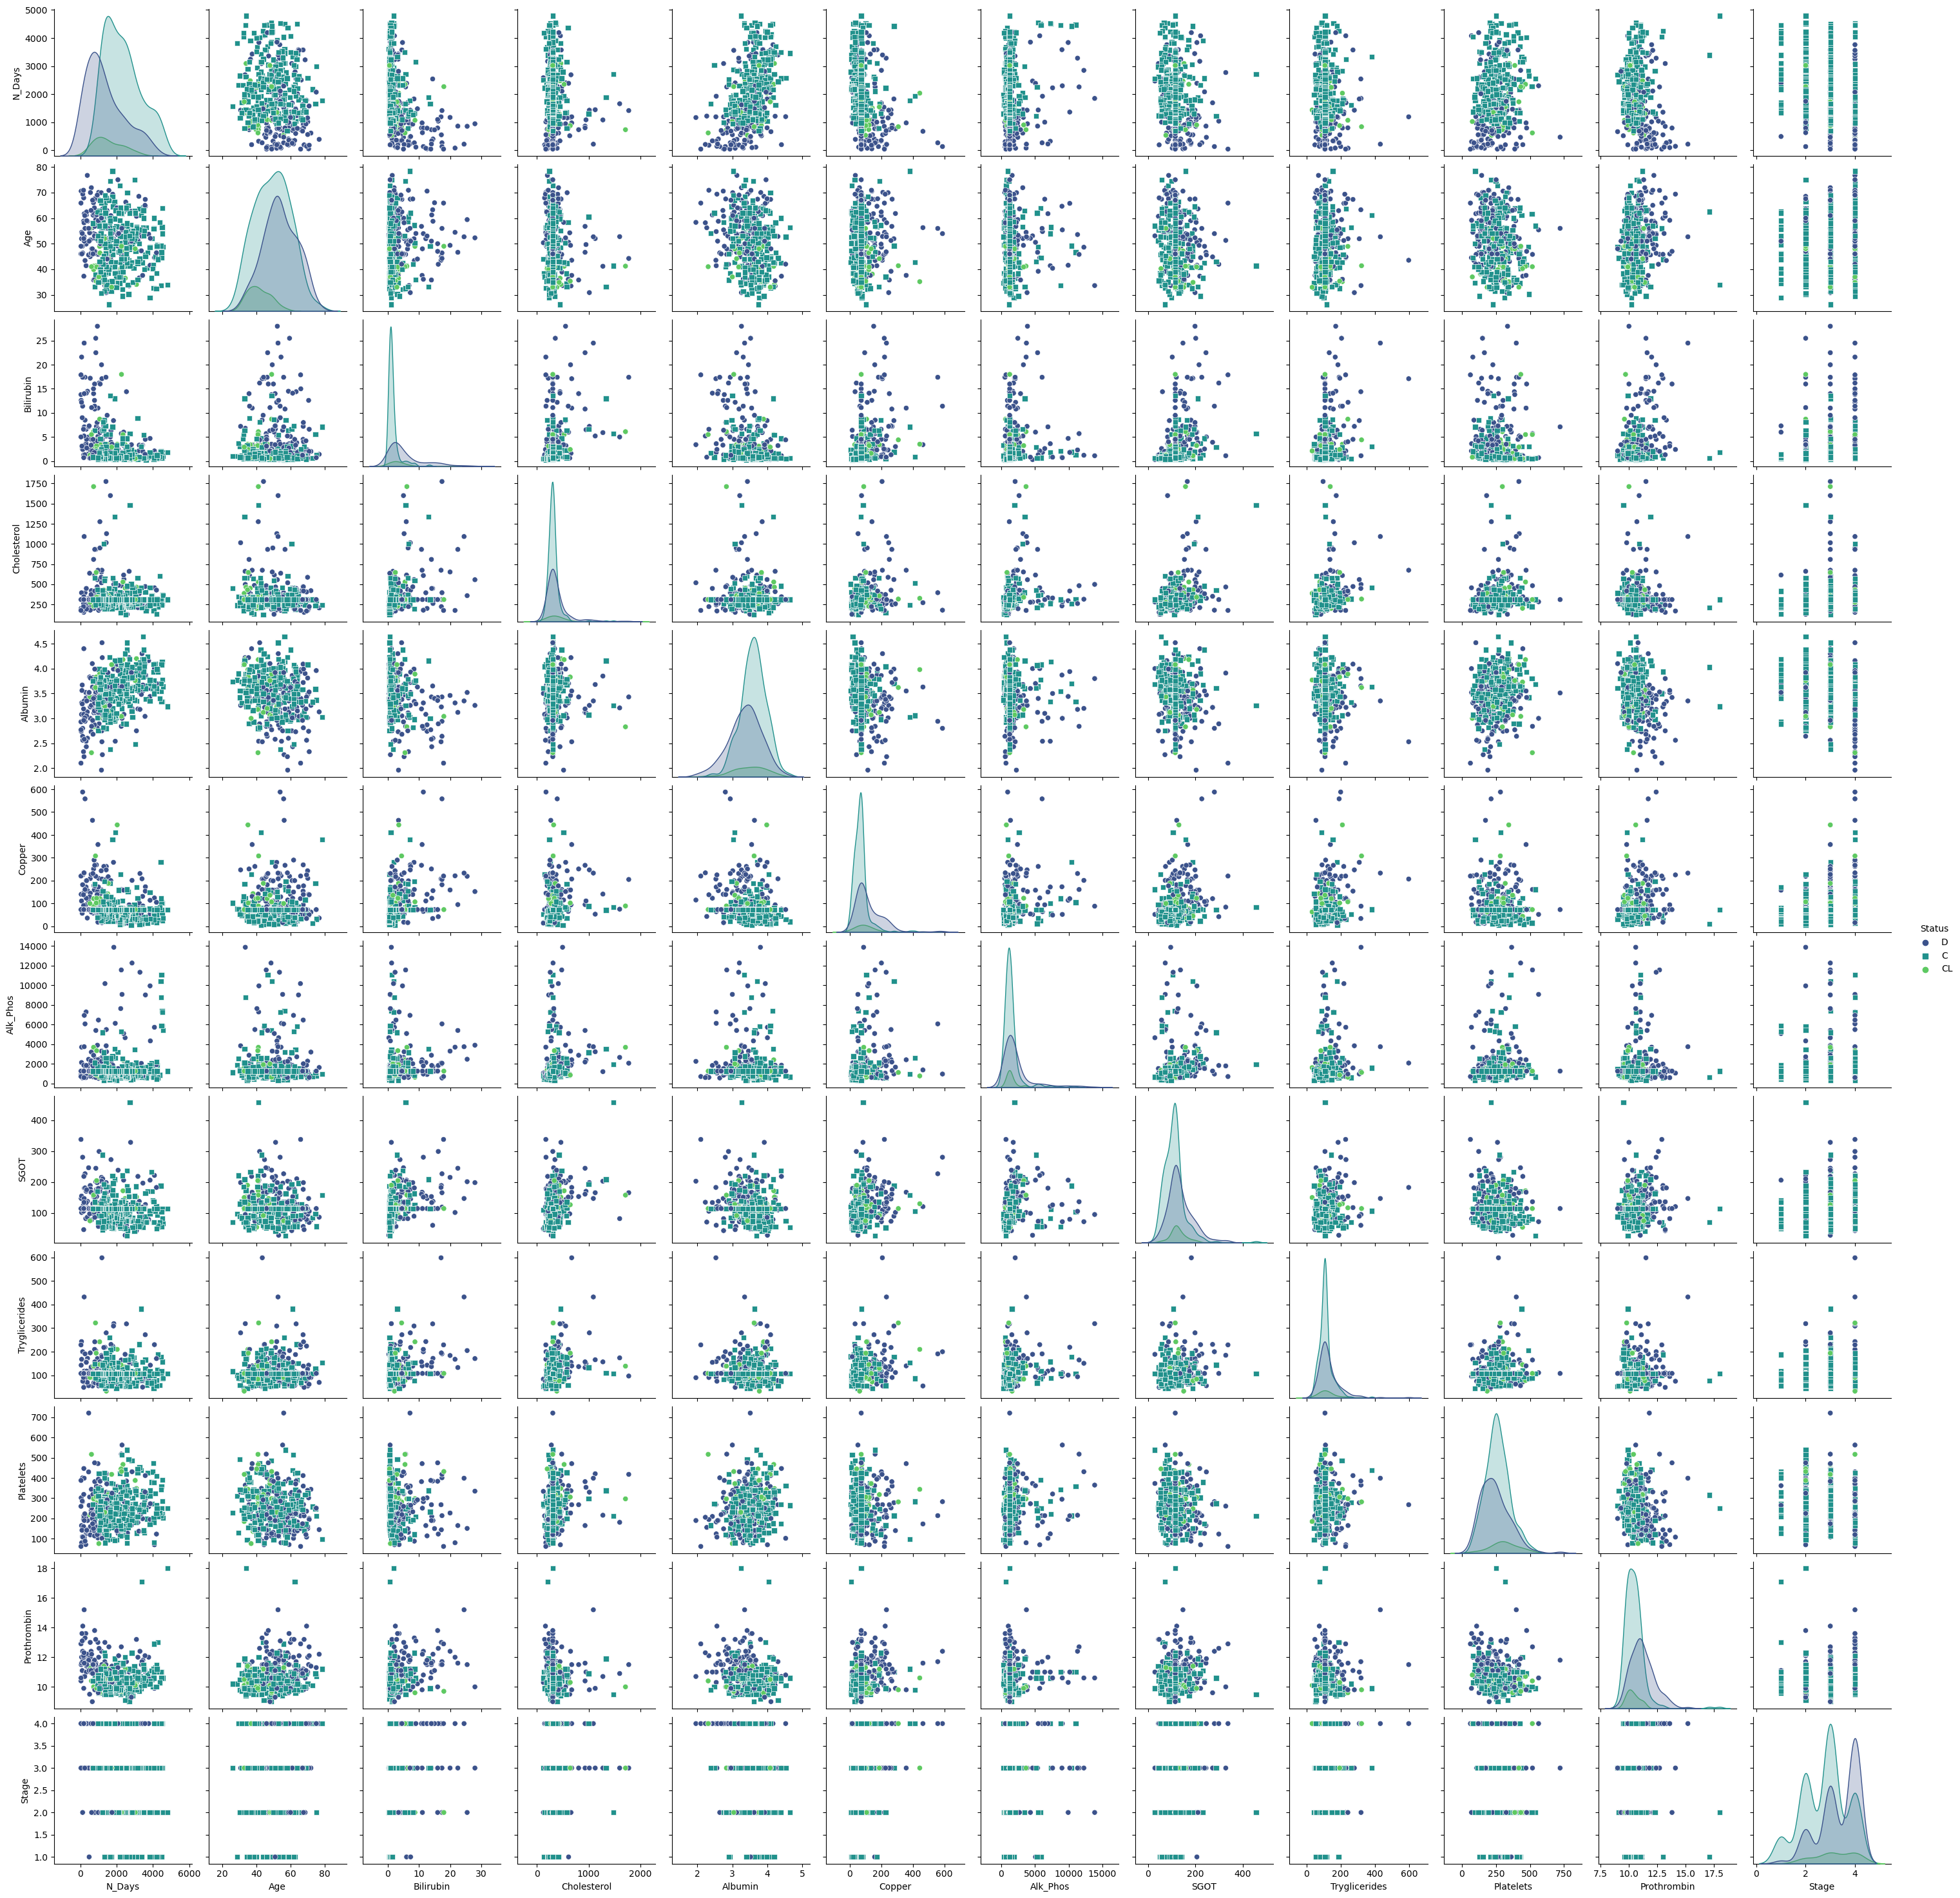

In [187]:
sns.pairplot(df, hue='Status', markers=['o', 's'], palette='viridis')
plt.show()

<Axes: >

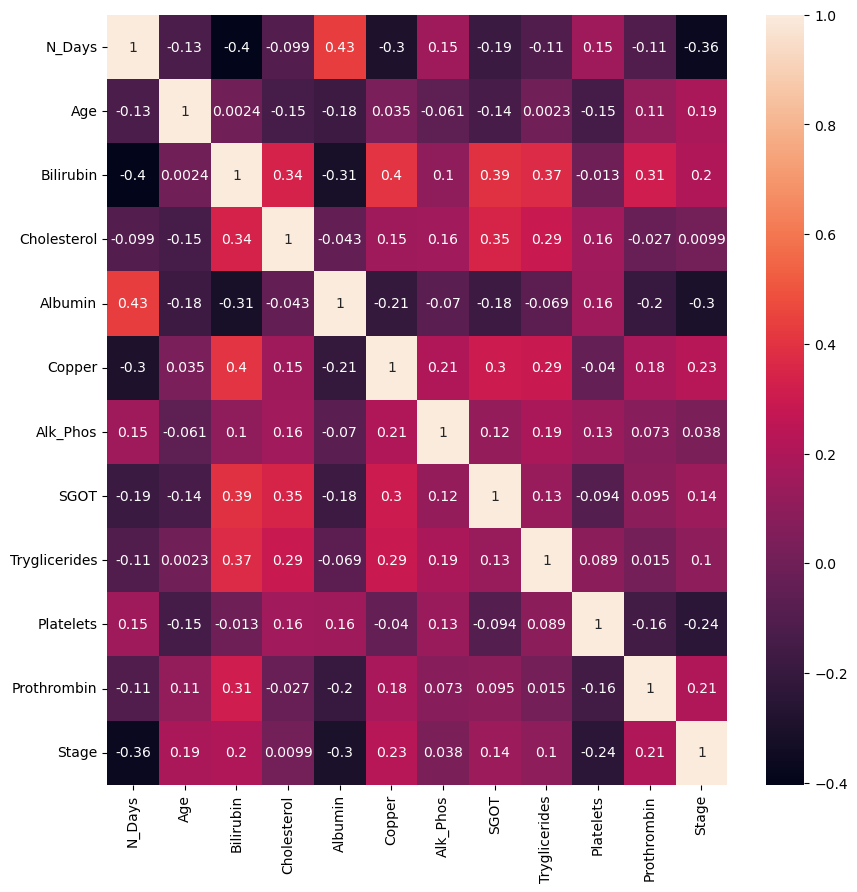

In [188]:

plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(numeric_only=True),annot=True)

# Encoding

In [233]:
df['Sex'] = df['Sex'].replace(['F', 'M'], [0, 1])


In [234]:
df['Ascites'] = df['Ascites'].replace(['N', 'Y'], [0, 1])
df['Hepatomegaly'] = df['Hepatomegaly'].replace(['N', 'Y'], [0, 1])
df['Spiders'] = df['Spiders'].replace(['N', 'Y'], [0, 1])

df['Edema'] = df['Edema'].replace(['N', 'S', 'Y'], [0.2, 0.4, 0.6])
df['Drug'] = df['Drug'].replace(['D-penicillamine', 'Placebo'], [0, 1])
df['Status'] =df['Status'].replace(['C', 'CL', 'D'], [0, 1, 2])



In [235]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,58.765229,0,1,1,1,0.6,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0,0,56.446270,0,0,1,1,0.2,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2,0,70.072553,1,0,0,0,0.4,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2,0,54.740589,0,0,1,1,0.4,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,38.105407,0,0,1,1,0.2,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,0,67.000684,0,0,1,0,0.2,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103,0,0,39.000684,0,0,1,0,0.2,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055,0,0,56.999316,0,0,1,0,0.2,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691,0,0,58.001369,0,0,1,0,0.2,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


# Skewness

In [242]:
df.skew()

N_Days           0.472602
Status           0.345418
Drug             0.547511
Age              0.086850
Sex              2.581753
Ascites          3.818659
Hepatomegaly    -0.568991
Spiders          1.390214
Edema            2.517545
Bilirubin        2.717611
Cholesterol      4.289884
Albumin         -0.467527
Copper           2.836711
Alk_Phos         3.595532
SGOT             1.784519
Tryglicerides    3.265724
Platelets        0.640278
Prothrombin      2.230162
Stage           -0.498641
dtype: float64

# Transformation

In [243]:
from sklearn.preprocessing import PowerTransformer

In [244]:
pt = PowerTransformer()
df[['Sex','Ascites','Spiders','Edema','Bilirubin','Cholesterol','Copper',
    'Alk_Phos','SGOT','Tryglicerides','Prothrombin']] = pt.fit_transform(df[['Sex','Ascites',
                        'Spiders','Edema','Bilirubin',
                       'Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Prothrombin']])

In [245]:
df.skew()

N_Days           0.472602
Status           0.345418
Drug             0.547511
Age              0.086850
Sex              2.581753
Ascites          3.818659
Hepatomegaly    -0.568991
Spiders          1.390214
Edema            1.933657
Bilirubin        0.269577
Cholesterol     -0.189248
Albumin         -0.467527
Copper           0.014372
Alk_Phos        -0.086003
SGOT             0.011078
Tryglicerides   -0.053241
Platelets        0.640278
Prothrombin      0.025516
Stage           -0.498641
dtype: float64

# Splitting the Data into Train and Test

In [236]:
from sklearn.model_selection  import train_test_split

In [247]:
x= df.drop('Status',axis=1)
y= df['Status']

In [248]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 10, test_size = 0.3)


# Scaling

In [246]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s= StandardScaler()


In [250]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain[['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets']] = sc.fit_transform(xtrain[['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets']])
xtest[['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets']] = sc.transform(xtest[['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets']])